In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Read Data CSV

In [ ]:
data = pd.read_csv('./Dataset_Calorie.csv',index_col=0)
data

# Drop unused columns

In [ ]:
data = data.drop(['Label', 'BMI_tags'], axis=1)
data

In [ ]:
# gather information about data attribute
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# change gender data type from object to numeric
data['gender']=data['gender'].apply(lambda x: 1 if x=='F' else 0)
data

In [ ]:
# Find info about the value of each attribute
data.describe().transpose()

In [ ]:
corr=data.corr()
corr['calories_to_maintain_weight']

In [ ]:
sns.set()
sns.pairplot(data)

In [ ]:
x_train=data.drop('calories_to_maintain_weight',axis=1)
y_train=data['calories_to_maintain_weight']

Normalization dapat mengontrol proses normalisasi secara fleksibel, seperti menentukan nilai rata-rata dan deviasi standar yang diinginkan, atau menggunakan statistik empiris dari data pelatihan. Normalisasi ini membantu dalam menjaga skala data yang konsisten, mempercepat konvergensi model, dan menghindari masalah gradien yang tidak stabil.

In [ ]:
# normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(x_train.shape[1],),axis=-1)
# normalizer.adapt(np.array(x_train))
# print(normalizer.mean.numpy())

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your input data in a NumPy array called 'X'
# X.shape = (num_samples, num_features)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your input data
scaler.fit(data.drop('calories_to_maintain_weight', axis=1))

# Transform the input data using the fitted scaler
X_scaled = scaler.transform(data.drop('calories_to_maintain_weight', axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
history=model.fit(x_train, y_train, epochs=200, batch_size=4,
                  validation_split=0.2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
plot_loss(history,50,200)

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
predict=model.predict(x_test)
predict.squeeze()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()


# Import all needed Libraries/Module

# Read Data CSV

# Drop unused columns

In [4]:
# gather information about data attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 1 to 23998
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10726 non-null  int64  
 1   weight(kg)                   10726 non-null  float64
 2   height(m)                    10726 non-null  float64
 3   gender                       10726 non-null  object 
 4   BMI                          10726 non-null  float64
 5   BMR                          10726 non-null  float64
 6   activity_level               10726 non-null  float64
 7   calories_to_maintain_weight  10726 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 754.2+ KB


In [6]:
# change gender data type from object to numeric
data['gender']=data['gender'].apply(lambda x: 1 if x=='F' else 0)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16.097862,0.932025,1,18.531612,958.584,1.2,1150.3008
2,4,14.619374,0.916687,1,17.397496,932.383,1.7,1585.0511
4,4,17.899918,0.997288,1,17.997414,977.578,1.9,1857.3982
6,3,13.532880,1.022786,1,12.936609,944.689,1.9,1794.9091
8,4,17.039484,1.053977,0,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,1,35.874169,1510.154,1.3,1963.2002
23988,85,97.976899,1.631409,1,36.812724,1473.418,1.7,2504.8106
23994,50,97.761259,1.631864,1,36.711217,1635.925,1.7,2781.0725
23997,57,96.829324,1.631290,1,36.386871,1593.981,1.3,2072.1753


In [8]:
corr=data.corr()
corr['calories_to_maintain_weight']

age                            0.394097
weight(kg)                     0.534520
height(m)                      0.577383
gender                        -0.133578
BMI                            0.429220
BMR                            0.600729
activity_level                 0.441669
calories_to_maintain_weight    1.000000
Name: calories_to_maintain_weight, dtype: float64

In [10]:
x_train=data.drop('calories_to_maintain_weight',axis=1)
y_train=data['calories_to_maintain_weight']

In [11]:
# normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(x_train.shape[1],),axis=-1)
# normalizer.adapt(np.array(x_train))
# print(normalizer.mean.numpy())

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

((8580, 7), (8580,))

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

In [54]:
model.evaluate(x_test,y_test)

68/68 [==============================] - 0s 725us/step - loss: 2.4868


2.4867820739746094

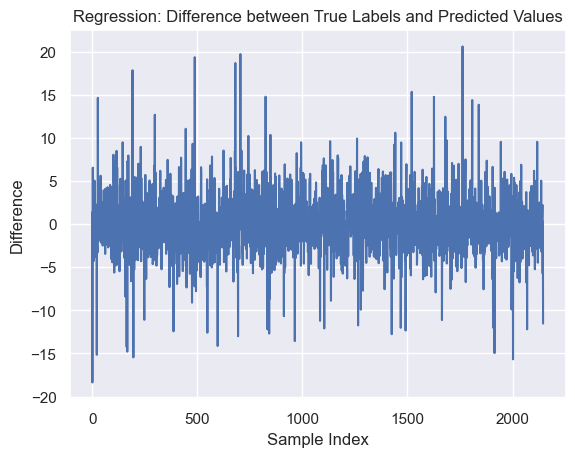

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()


hasil= y true - predict

* y true= data asli -> y_test
* predict= data prediksi -> hasil predict model terhadap x_test

if hasil<0 -> kalori yg diprediksi berlebihan

if hasil >0 -> kalori yg diprediksi kurang

In [59]:
sorted(diff, reverse=True) #jumlah kalori yang diprediksi kekurangan kalori

[20.589663085937445,
 19.705650000000105,
 19.342544531249814,
 18.66865488281246,
 17.827993359374886,
 15.332133593750086,
 14.767153124999822,
 14.748816015624925,
 14.631424023437603,
 14.37556718750011,
 13.835589062499821,
 12.673912109374896,
 12.443285156250113,
 11.044923828124865,
 10.591347656249809,
 10.34258046874993,
 10.213850390624884,
 9.912923828124804,
 9.712514453125095,
 9.610201562499924,
 9.532851171874881,
 9.532309765625087,
 9.482575390624788,
 9.478758984374963,
 9.458263671875102,
 9.30473828124991,
 9.202911523437479,
 8.950196289062546,
 8.524403515625181,
 8.518253124999774,
 8.48664218749991,
 8.469626953125044,
 8.221524999999929,
 8.039169140624836,
 7.9608675781250895,
 7.945212890625044,
 7.888662109375218,
 7.824117968749761,
 7.7394287109375455,
 7.700640234374987,
 7.676876562500183,
 7.665616015624892,
 7.618560156249941,
 7.499287109375018,
 7.445881250000184,
 7.422216796875091,
 7.349872265624981,
 7.302617578124909,
 7.292425000000094,
 7.260